In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.cross_validation import cross_val_score

In [2]:
file_path = '/data/opinion_spam/real/reviewsNew.txt-utf8'
datas = []
MIN_FD = 100
raw_file = open(file_path)
debug = False
debug_size = 100
_debug_count = 0
for line in raw_file:    
    try:
        line = line.decode('gbk')
    except:
        continue
    #print 'gbk', line
    line = line.encode('utf-8')
    #print 'utf8', line
    item = line.split('\t')
    if len(item) == 8:
        hfd = float(item[3])
        fd = float(item[4])
        ratings = float(item[5])
        if fd > MIN_FD:
            hfdfd = round(hfd/fd, 2)
            #whole_filted_body += item[7]
            item.append(hfdfd)
            datas.append(item)
            if debug == True:
                _debug_count += 1
                if _debug_count >= debug_size:
                    break
raw_file.close()
print 'datas.size: ', len(datas)
print datas[0]

datas.size:  100
['A1004AX2J2HXGL', 'B00003CWPL', 'December 2, 2003', '111', '125', '5.0', '"But what the hell do they know, I said?"', ' If you\'re reading this, then you\'ve seen this movie or are at least curious what all the hype is about?    The late Stanley Kubrick, the only major filmmaker Lynch has cited as a direct cinematic influence, believed that ERASERHEAD was one of the most perfect "cinematic experiences" created to date.  This movie has enjoyed success on the midnight movie circuit for years, particularly in NYC where it ran almost every night for something like five years straight. I\'ve seen it on big and little screens in three different states.  Insofar as interpretations are concerned, I\'ve long since tossed all that out the window.  In terms of rational comprehension, ERASERHEAD is the fabled big fish that remains brilliantly elusive of any attempts to capture it.     This movie gets better, and more humorous, every time I watch it: in my opinion - ERASERHEAD is 

In [132]:
#set column names
column_names = ['rid', 'pid', 'date', 'hfd', 'fd', 'rating', 'title', 'body', 'hfdfd']
df = pd.DataFrame(datas)
df.columns = column_names

#transfer the type of column
df[['hfd', 'fd','rating']] = df[['hfd', 'fd', 'rating']].astype(float)

df.head()


,rid,pid,date,hfd,fd,rating,title,body,hfdfd
0,A1004AX2J2HXGL,B00003CWPL,"December 2, 2003",111,125,5,"""But what the hell do they know, I said?""","If you're reading this, then you've seen this...",0.89
1,A103PHKSEPT10R,0939484463,"July 5, 2000",69,116,5,"Credible, Interesting, & Devasting",I've read Prof Butz's book twice and an still...,0.59
2,A103U0Q3IKSXHE,0875845851,"January 29, 2000",111,115,4,Identifying the horns of the dilemma.,"Prior to reading this book, I chalked up the ...",0.97
3,A105YVLAZNYQUU,B000634DCW,"June 21, 2005",6,112,1,UGGHHH,Craptacular and boring. The cinematography an...,0.05
4,A1075MZNVRMSEO,1563249367,"April 2, 2002",190,190,5,A historical portrait & revelation- un chin de...,This book is a fascinating journey through th...,1.00


In [5]:
df.describe()

,hfd,fd,rating,hfdfd
count,100.000000,100.000000,100.00000,100.000000
mean,129.690000,159.060000,4.14000,0.801700
std,115.687291,118.980163,1.42148,0.261565
min,6.000000,101.000000,1.00000,0.050000
25%,92.750000,109.000000,4.00000,0.727500
50%,106.500000,124.500000,5.00000,0.930000
75%,137.000000,158.000000,5.00000,0.980000
max,966.000000,1065.000000,5.00000,1.000000


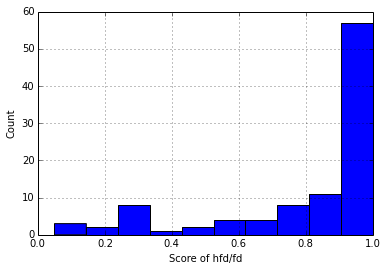

In [6]:
#hfdfd distribution
df.hfdfd.hist()
plt.title='The Distribute of hfd/fd'
plt.xlabel('Score of hfd/fd')
plt.ylabel('Count')

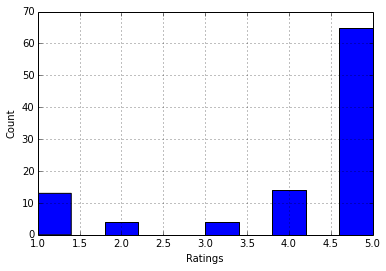

In [7]:
#rating distribution
df.rating.hist()
plt.xlabel('Ratings')
plt.ylabel("Count")

In [8]:
#count how many products in the dataset  ==》9809 products
df.groupby('pid').count().shape
print 'different product size:', df.groupby('pid').count().shape[0] 

different product size: 100


In [9]:
df.shape

(100, 9)

In [10]:
df['title_len'] = df['title'].apply(len)
df['body_len'] = df['body'].apply(len)

In [11]:
df.head()

,rid,pid,date,hfd,fd,rating,title,body,hfdfd,title_len,body_len
0,A1004AX2J2HXGL,B00003CWPL,"December 2, 2003",111,125,5,"""But what the hell do they know, I said?""","If you're reading this, then you've seen this...",0.89,41,2642
1,A103PHKSEPT10R,0939484463,"July 5, 2000",69,116,5,"Credible, Interesting, & Devasting",I've read Prof Butz's book twice and an still...,0.59,34,313
2,A103U0Q3IKSXHE,0875845851,"January 29, 2000",111,115,4,Identifying the horns of the dilemma.,"Prior to reading this book, I chalked up the ...",0.97,37,1495
3,A105YVLAZNYQUU,B000634DCW,"June 21, 2005",6,112,1,UGGHHH,Craptacular and boring. The cinematography an...,0.05,6,1045
4,A1075MZNVRMSEO,1563249367,"April 2, 2002",190,190,5,A historical portrait & revelation- un chin de...,This book is a fascinating journey through th...,1.00,59,2180


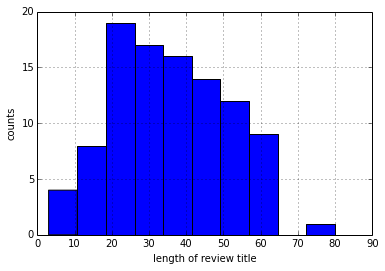

In [12]:
df['title_len'].hist()
plt.xlabel('length of review title')
plt.ylabel('counts')

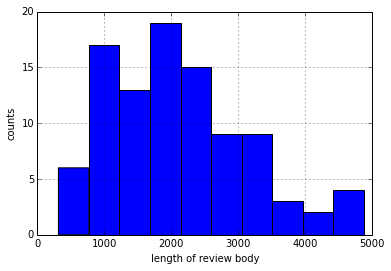

In [13]:
df[df['body_len'] > 10][df['body_len'] < 5000]['body_len'].hist()
plt.xlim(0, 5000)
plt.xlabel("length of review body")
plt.ylabel("counts")

In [14]:
df[['title_len', 'body_len']].describe()

,title_len,body_len
count,100.000000,100.000000
mean,35.810000,2190.390000
std,15.042495,1157.861036
min,3.000000,313.000000
25%,24.000000,1342.500000
50%,35.000000,2024.000000
75%,48.000000,2882.000000
max,80.000000,5397.000000


# TFIDF features

In [15]:
#TFIDF feature without lsa

import evaluation_self as es
max_features_count = 10000
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.5, max_features=max_features_count,
                                 min_df=2, stop_words='english', tokenizer = es.tokenize_and_stem)

tfidf_matrix = vectorizer.fit_transform(df.body)
print "the tfidf matrix size : ",tfidf_matrix.shape
print type(tfidf_matrix)


the tfidf matrix size :  (100, 1856)
<class 'scipy.sparse.csr.csr_matrix'>


In [16]:
#TFIDF-CV-10-lsvr
from sklearn.svm import LinearSVR

lsvr = LinearSVR()



scores2 = cross_val_score(lsvr, tfidf_matrix, df.hfdfd, cv=10, scoring="mean_squared_error")

mse2 = abs(scores2)
print 'TFIDF-cv10-LSVR, mse:', mse2
print 'TFIDF-cv10-LSVR, mse mean:', np.mean(mse2)
print 'TFIDF-cv10-LSVR, rmse:', np.sqrt(mse2)
print 'TFIDF-cv10-LSVR, rmse mean:', np.mean(np.sqrt(mse2))

TFIDF-cv10-LSVR, mse: [ 0.08141843  0.04912015  0.10494625  0.04176223  0.06310335  0.04258813
  0.0500242   0.03956884  0.01890094  0.07190554]
TFIDF-cv10-LSVR, mse mean: 0.0563338068051
TFIDF-cv10-LSVR, rmse: [ 0.28533916  0.22163065  0.32395409  0.2043581   0.25120379  0.20636892
  0.22366091  0.19891918  0.13748069  0.26815209]
TFIDF-cv10-LSVR, rmse mean: 0.232106758195


In [17]:
#TFIDF-CV-10-svr
from sklearn.svm import SVR

svr = SVR()

from sklearn.cross_validation import cross_val_score

scores2 = cross_val_score(svr, tfidf_matrix, df.hfdfd, cv=10, scoring="mean_squared_error")

mse2 = abs(scores2)
print 'TFIDF-cv10-SVR, mse:', mse2
print 'TFIDF-cv10-SVR, mse mean:', np.mean(mse2)
print 'TFIDF-cv10-SVR, rmse:', np.sqrt(mse2)
print 'TFIDF-cv10-SVR, rmse mean:', np.mean(np.sqrt(mse2))

TFIDF-cv10-SVR, mse: [ 0.10782484  0.03885816  0.15268398  0.01068192  0.0971278   0.07590734
  0.07890349  0.05963978  0.00829349  0.10984222]
TFIDF-cv10-SVR, mse mean: 0.0739763006971
TFIDF-cv10-SVR, rmse: [ 0.32836693  0.19712472  0.39074797  0.10335338  0.31165334  0.27551286
  0.28089765  0.24421256  0.09106859  0.33142453]
TFIDF-cv10-SVR, rmse mean: 0.255436253884


In [18]:
#TFIDF-CV-10-lr
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

from sklearn.cross_validation import cross_val_score

scores2 = cross_val_score(lr, tfidf_matrix, df.hfdfd, cv=10, scoring="mean_squared_error")

mse2 = abs(scores2)
print 'TFIDF-cv10-LR, mse:', mse2
print 'TFIDF-cv10-LR, mse mean:', np.mean(mse2)
print 'TFIDF-cv10-LR, rmse:', np.sqrt(mse2)
print 'TFIDF-cv10-LR, rmse mean:', np.mean(np.sqrt(mse2))

TFIDF-cv10-LR, mse: [ 0.08428988  0.04914983  0.10853811  0.03688545  0.06363214  0.04363286
  0.05190089  0.0389887   0.01494012  0.07207759]
TFIDF-cv10-LR, mse mean: 0.0564035564685
TFIDF-cv10-LR, rmse: [ 0.29032719  0.22169761  0.32945123  0.19205586  0.25225411  0.2088848
  0.22781766  0.19745556  0.12222977  0.2684727 ]
TFIDF-cv10-LR, rmse mean: 0.231064649804


# TFIDF - LSA features

In [19]:
#TFIDF feature without lsa
from time import time
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

import evaluation_self as es
max_features_count = 10000
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.5, max_features=max_features_count,
                                 min_df=2, stop_words='english', tokenizer = es.tokenize_and_stem)
lsa_tfidf_matrix = vectorizer.fit_transform(df.body)
print "the tfidf matrix size : ",tfidf_matrix.shape
print type(tfidf_matrix)

lsaornot = True
lsanum = 1000

if lsaornot:
    print "Performing dimensionality reduction using LSA"
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(lsanum)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    lsa_tfidf_matrix = lsa.fit_transform(tfidf_matrix)

    print "done in ", (time() - t0)
    explained_variance = svd.explained_variance_ratio_.sum()
    print "Explained variance of the SVD step:", int(explained_variance * 100)


the tfidf matrix size :  (100, 1856)
<class 'scipy.sparse.csr.csr_matrix'>
Performing dimensionality reduction using LSA
done in  3.97117805481
Explained variance of the SVD step: 100


In [20]:
#TFIDF-LSA-cv10-LR
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

from sklearn.cross_validation import cross_val_score

scores2 = cross_val_score(lr, lsa_tfidf_matrix, df.hfdfd, cv=10, scoring="mean_squared_error")

mse2 = abs(scores2)
print 'TFIDF-LSA-cv10-LR, mse:', mse2
print 'TFIDF-LSA-cv10-LR, mse mean:', np.mean(mse2)
print 'TFIDF-LSA-cv10-LR, rmse2:', np.sqrt(mse2)
print 'TFIDF-LSA-cv10-LR, rmse2 mean:', np.mean(np.sqrt(mse2))

TFIDF-LSA-cv10-LR, mse: [ 0.08318471  0.04911305  0.11214023  0.04994519  0.06862034  0.04320624
  0.05109641  0.07813153  0.01508527  0.0719044 ]
TFIDF-LSA-cv10-LR, mse mean: 0.0622427379898
TFIDF-LSA-cv10-LR, rmse2: [ 0.2884176   0.22161464  0.33487346  0.22348421  0.26195484  0.2078611
  0.22604515  0.27952018  0.12282211  0.26814996]
TFIDF-LSA-cv10-LR, rmse2 mean: 0.243474326366


In [21]:
#TFIDF-LSA-CV-10-lsvr
from sklearn.svm import LinearSVR

lsvr = LinearSVR()

from sklearn.cross_validation import cross_val_score

scores2 = cross_val_score(lsvr, lsa_tfidf_matrix, df.hfdfd, cv=10, scoring="mean_squared_error")

mse2 = abs(scores2)
print 'TFIDF-cv10-LSVR, mse:', mse2
print 'TFIDF-cv10-LSVR, mse mean:', np.mean(mse2)
print 'TFIDF-cv10-LSVR, rmse:', np.sqrt(mse2)
print 'TFIDF-cv10-LSVR, rmse mean:', np.mean(np.sqrt(mse2))

TFIDF-cv10-LSVR, mse: [ 0.08141831  0.04912238  0.10494893  0.04176202  0.06310205  0.04258656
  0.050024    0.03957024  0.01890472  0.07190528]
TFIDF-cv10-LSVR, mse mean: 0.0563344480702
TFIDF-cv10-LSVR, rmse: [ 0.28533894  0.22163569  0.32395822  0.20435758  0.25120121  0.20636511
  0.22366045  0.19892271  0.13749445  0.26815159]
TFIDF-cv10-LSVR, rmse mean: 0.232108593602


In [22]:
#TFIDF-LSA-CV-10-svr
t0 = time()
from sklearn.svm import SVR

svr = SVR()

from sklearn.cross_validation import cross_val_score

scores2 = cross_val_score(svr, lsa_tfidf_matrix, df.hfdfd, cv=10, scoring="mean_squared_error")

mse2 = abs(scores2)
print 'TFIDF-cv10-SVR, mse:', mse2
print 'TFIDF-cv10-SVR, mse mean:', np.mean(mse2)
print 'TFIDF-cv10-SVR, rmse:', np.sqrt(mse2)
print 'TFIDF-cv10-SVR, rmse mean:', np.mean(np.sqrt(mse2))
print "tfidf-svr cost:", (time() - t0)

TFIDF-cv10-SVR, mse: [ 0.10253726  0.03873028  0.14433088  0.01243679  0.09113803  0.07184335
  0.07314219  0.0558068   0.00898287  0.1030408 ]
TFIDF-cv10-SVR, mse mean: 0.0701989240622
TFIDF-cv10-SVR, rmse: [ 0.3202144   0.1968001   0.37990904  0.11152036  0.30189076  0.26803609
  0.27044813  0.23623462  0.094778    0.32099969]
TFIDF-cv10-SVR, rmse mean: 0.250083118278
tfidf-svr cost: 0.0430550575256


# STD features

In [23]:
#STD features

import nltk
import re

def seg_sentence(text):
    sentences = nltk.sent_tokenize(text)
    return [s.strip() for s in sentences if(len(s)) > 0]

def marks_num(text, pattern):
    return len(re.findall(pattern, text))

std_exc = 0
def std_feature(text): # std in Yang@acl-2015
#    print '==============================='
    ary = [0, 0, 0, 0, 0]
    try:
        tokens = es.tokenize_and_stem(text)
        token_num = len(tokens)
    #    print 'token size:', token_num
        sentences = seg_sentence(text)
        sen_num = len(sentences)
    #    print 'sentence size:', sen_num
        avg_sentence_len = np.mean([len(x) for x in sentences])
    #    print 'avg sentence length:', avg_sentence_len
        exc_num = marks_num(text, r'[!！]')
    #    print 'exclamation marks count:', exc_num
        que_num = marks_num(text, r'[？?]')
    #    print 'question percentage:', float(que_num) / sen_num
        ary = [token_num, sen_num, avg_sentence_len, exc_num, que_num]
#         print ary
    except:
#         print text
        std_exc += 1
    finally:
        return ary
    
for loc in range(1, 10):
    print std_feature(df.body.head(10)[loc])

[46, 3, 100.33333333333333, 0, 0]
[152, 12, 122.08333333333333, 0, 0]
[118, 12, 85.333333333333329, 0, 3]
[173, 11, 196.36363636363637, 1, 0]
[122, 15, 77.933333333333337, 1, 1]
[255, 21, 134.38095238095238, 0, 1]
[47, 3, 101.0, 1, 0]
[110, 6, 155.16666666666666, 0, 0]
[151, 13, 117.84615384615384, 0, 2]


In [24]:
#generate std features


X_std = np.array(df.body)
print type(X_std)
X_std = np.array(map(std_feature, X_std))
print "std exception: ", std_exc

print type(X_std)
print X_std.shape

from sklearn.preprocessing import Normalizer
std_normalizer = Normalizer().fit(X_std)
X_std = std_normalizer.transform(X_std)

print std_normalizer

<type 'numpy.ndarray'>
std exception:  0
<type 'numpy.ndarray'>
(100, 5)
Normalizer(copy=True, norm='l2')


In [25]:
#std-cv10-lr
from sklearn.linear_model import LinearRegression
std_lr = LinearRegression()

std_scores = cross_val_score(std_lr, X_std, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'STD-cv10-LR, mse:', std_mse
print 'STD-cv10-LR, mse mean:', np.mean(std_mse)
print 'STD-cv10-LR, rmse:', np.sqrt(std_mse)
print 'STD-cv10-LR, rmse mean:', np.mean(np.sqrt(std_mse))

STD-cv10-LR, mse: [ 0.06500286  0.03528658  0.1532927   0.01377453  0.08483742  0.04885342
  0.07232473  0.04269288  0.02168829  0.0902642 ]
STD-cv10-LR, mse mean: 0.0628017604365
STD-cv10-LR, rmse: [ 0.25495658  0.18784721  0.39152611  0.11736496  0.29126863  0.22102809
  0.26893258  0.20662256  0.14726944  0.30044002]
STD-cv10-LR, rmse mean: 0.238725618604


In [26]:
#std-cv10-lsvr
from sklearn.svm import LinearSVR
std_lsvr = LinearSVR()

std_scores = cross_val_score(std_lsvr, X_std, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'STD-cv10-LSVR, mse:', std_mse
print 'STD-cv10-LSVR, mse mean:', np.mean(std_mse)
print 'STD-cv10-LSVR, rmse:', np.sqrt(std_mse)
print 'STD-cv10-LSVR, rmse mean:', np.mean(np.sqrt(std_mse))

STD-cv10-LSVR, mse: [ 0.11381877  0.0368927   0.1751122   0.00347443  0.11290049  0.07960913
  0.09284337  0.0586551   0.00655088  0.12937534]
STD-cv10-LSVR, mse mean: 0.080923241505
STD-cv10-LSVR, rmse: [ 0.33737037  0.19207473  0.41846409  0.05894433  0.33600668  0.2821509
  0.30470209  0.24218816  0.08093752  0.35968784]
STD-cv10-LSVR, rmse mean: 0.261252672298


In [27]:
#std-cv10-svr
t0 = time()
from sklearn.svm import SVR
std_svr = SVR()

std_scores = cross_val_score(std_svr, X_std, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'STD-cv10-SVR, mse:', std_mse
print 'STD-cv10-SVR, mse mean:', np.mean(std_mse)
print 'STD-cv10-SVR, rmse:', np.sqrt(std_mse)
print 'STD-cv10-SVR, rmse mean:', np.mean(np.sqrt(std_mse))
print "STD-svr cost:", (time() - t0)

STD-cv10-SVR, mse: [ 0.10395625  0.03702948  0.15147344  0.01011492  0.09645771  0.0735336
  0.07717419  0.0560485   0.01123691  0.11054614]
STD-cv10-SVR, mse mean: 0.0727571150049
STD-cv10-SVR, rmse: [ 0.32242247  0.19243046  0.38919589  0.10057296  0.31057642  0.27117079
  0.27780244  0.23674563  0.10600431  0.3324848 ]
STD-cv10-SVR, rmse mean: 0.253940618231
STD-svr cost: 0.036581993103


In [28]:
#def cut sentence
stop_words = 'a,able,about,across,after,all,almost,also,am,among,an,and,any,are,as,at,be,because,been,but,by,can,cannot,could,dear,did,do,does,either,else,ever,every,for,from,get,got,had,has,have,he,her,hers,him,his,how,however,i,if,in,into,is,it,its,just,least,let,like,likely,may,me,might,most,must,my,neither,no,nor,not,of,off,often,on,only,or,other,our,own,rather,said,say,says,she,should,since,so,some,than,that,the,their,them,then,there,these,they,this,tis,to,too,twas,us,wants,was,we,were,what,when,where,which,while,who,whom,why,will,with,would,yet,you,your'
stop_words_list = stop_words.split(',')

def cut_into_tokens(text):

    _list = [word.lower() for sentence in nltk.sent_tokenize(text) for word in sentence.split()]
    _list = [re.sub(r'[.?!\'",)(;&%:]', '', word) for word in _list  ]
    _list = [word for word in _list if word not in stop_words_list and len(word) > 0]
    return _list

# Syntactic features of Kim

In [29]:
#Syntactic features of Kim

text = df.body.head(1)[0]
print text
#print nltk.pos_tag([word  for sentence in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sentence)])

def pos_count(text):
    poses = nltk.pos_tag(cut_into_tokens(text))
#     poses = nltk.pos_tag([word  for sentence in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sentence)])
    pos_dict = {}
    for (word, pos) in poses:
        if pos in pos_dict:
            pos_dict[pos] = pos_dict[pos] + 1
        else:
            pos_dict[pos] = 1
    return pos_dict

pos_dict = pos_count(text)#per sentence per second!!!!
# for pos in pos_dict:
#     print pos, " => ", pos_dict[pos]
# print 'aa'
syn_exc = 0

def fetch_count_from_pos_dict(pos_list, pos_dict):
    _pos_count = 0
    for pos in pos_list:
        if pos in pos_dict:
            _pos_count += pos_dict[pos]
    return _pos_count

def syntactic_feature(text): #syn feature function
    ary = [0, 0, 0, 0]
    try:
        pos_dict = pos_count(text)
        nn_count = fetch_count_from_pos_dict(['NN', 'NNS', 'NNP', 'NNPS'], pos_dict)#noun
        jj_count = fetch_count_from_pos_dict(['JJ', 'JJR', 'JJS'], pos_dict)#adj
        vb_count = fetch_count_from_pos_dict(['VB', 'VBD', 'VBG', 'VBN', 'VNP', 'VBZ'], pos_dict)#vb
        rb_count = fetch_count_from_pos_dict(['RB', 'RBR', 'RBS'], pos_dict)#adv
        ary = [nn_count, jj_count, vb_count, rb_count]
    except:
        print 'error'
        syn_exc += 1
    finally:
        return ary
# print 't_dict', pos_dict['_t_dict']
for _text in df.body.head(10):
    print syntactic_feature(_text)
print 'syn_exc is ', syn_exc

 If you're reading this, then you've seen this movie or are at least curious what all the hype is about?    The late Stanley Kubrick, the only major filmmaker Lynch has cited as a direct cinematic influence, believed that ERASERHEAD was one of the most perfect "cinematic experiences" created to date.  This movie has enjoyed success on the midnight movie circuit for years, particularly in NYC where it ran almost every night for something like five years straight. I've seen it on big and little screens in three different states.  Insofar as interpretations are concerned, I've long since tossed all that out the window.  In terms of rational comprehension, ERASERHEAD is the fabled big fish that remains brilliantly elusive of any attempts to capture it.     This movie gets better, and more humorous, every time I watch it: in my opinion - ERASERHEAD is the cinematic experience that comes the closest to capturing "dream logic", next to the equally brilliant WAKING LIFE.  If you ever get the c

In [30]:
X_syn = []
t0 = time()
for _body in df.body:
    _v = syntactic_feature(_body)
    X_syn.append(_v)
print len(X_syn)

from sklearn.preprocessing import Normalizer

syn_normalizer = Normalizer()
syn_normalizer.fit(X_syn)
X_syn = syn_normalizer.transform(X_syn)

# print X_w2v
print syn_normalizer
print 'init syn cost : ', time()-t0

100
Normalizer(copy=True, norm='l2')


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


In [31]:
#syn-cv-10-LR
from sklearn.linear_model import LinearRegression

syn_lr = LinearRegression()

std_scores = cross_val_score(syn_lr, X_syn, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'SYN-cv10-LR, mse:', std_mse
print 'SYN-cv10-LR, mse mean:', np.mean(std_mse)
print 'SYN-cv10-LR, rmse:', np.sqrt(std_mse)
print 'SYN-cv10-LR, rmse mean:', np.mean(np.sqrt(std_mse))

SYN-cv10-LR, mse: [ 0.10462254  0.05454791  0.13415301  0.03058137  0.11306078  0.08782886
  0.05758035  0.0522465   0.01209688  0.07854349]
SYN-cv10-LR, mse mean: 0.0725261692847
SYN-cv10-LR, rmse: [ 0.32345407  0.23355494  0.36626905  0.1748753   0.33624512  0.29635935
  0.23995905  0.22857494  0.1099858   0.28025611]
SYN-cv10-LR, rmse mean: 0.258953373802


In [32]:
#syn-cv-10-LSVR
from sklearn.svm import LinearSVR

syn_lsvr = LinearSVR()

std_scores = cross_val_score(syn_lsvr, X_syn, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'SYN-cv10-LSVR, mse:', std_mse
print 'SYN-cv10-LSVR, mse mean:', np.mean(std_mse)
print 'SYN-cv10-LSVR, rmse:', np.sqrt(std_mse)
print 'SYN-cv10-LSVR, rmse mean:', np.mean(np.sqrt(std_mse))

SYN-cv10-LSVR, mse: [ 0.13152924  0.04646113  0.1789278   0.00593386  0.11167766  0.09139894
  0.09260332  0.05771481  0.00257605  0.12566551]
SYN-cv10-LSVR, mse mean: 0.0844488321054
SYN-cv10-LSVR, rmse: [ 0.3626696   0.21554843  0.42299858  0.07703155  0.33418208  0.30232258
  0.30430793  0.24023907  0.0507548   0.35449332]
SYN-cv10-LSVR, rmse mean: 0.26645479455


In [33]:
#syn-cv-10-SVR
t0 = time()
from sklearn.svm import SVR

syn_lsvr = SVR()

std_scores = cross_val_score(syn_lsvr, X_syn, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'SYN-cv10-SVR, mse:', std_mse
print 'SYN-cv10-SVR, mse mean:', np.mean(std_mse)
print 'SYN-cv10-SVR, rmse:', np.sqrt(std_mse)
print 'SYN-cv10-SVR, rmse mean:', np.mean(np.sqrt(std_mse))
print "SYN-svr cost:", (time() - t0)

SYN-cv10-SVR, mse: [ 0.10835548  0.04106706  0.15071772  0.0124428   0.09822887  0.0789925
  0.07749351  0.05689127  0.00612068  0.10719769]
SYN-cv10-SVR, mse mean: 0.0737507600257
SYN-cv10-SVR, rmse: [ 0.32917394  0.20265009  0.38822381  0.11154731  0.31341485  0.28105605
  0.27837656  0.23851892  0.07823481  0.32741059]
SYN-cv10-SVR, rmse mean: 0.254860691454
SYN-svr cost: 0.0317320823669


# Word2Vec features

In [34]:
#w2v features

from gensim import corpora, models, similarities
import gensim

#load model
fname = '/data/opinion_spam/real/w2v-hfd-over-0.total'
#gensim.models.Word2Vec(sentences, min_count=5, size=100, window=5, workers=32)
model = gensim.models.Word2Vec.load(fname)
model.init_sims(replace=True)

In [35]:
def model_with_sentence(sentence, model):
    tokens = cut_into_tokens(sentence)
    v = np.zeros(100)
    _error = 0
    for token in tokens:
        try:
            _v = model[token]
            v += _v
        except:
            _error += 1
#             print 'token:', token, 'not in the dict'
    return v
print 'def model_with_sentence'

def model_with_sentence


In [36]:
X_w2v = []
for _body in df.body:
    _v = model_with_sentence(_body, model)
    X_w2v.append(_v)
print len(X_w2v)

from sklearn.preprocessing import Normalizer

w2v_normalizer = Normalizer()
w2v_normalizer.fit(X_w2v)
X_w2v = w2v_normalizer.transform(X_w2v)

# print X_w2v
print w2v_normalizer

100
Normalizer(copy=True, norm='l2')


In [37]:
#w2v-cv-10-LR
from sklearn.linear_model import LinearRegression

w2v_lr = LinearRegression()

std_scores = cross_val_score(w2v_lr, X_w2v, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'W2V-cv10-LR, mse:', std_mse
print 'W2V-cv10-LR, mse mean:', np.mean(std_mse)
print 'W2V-cv10-LR, rmse:', np.sqrt(std_mse)
print 'W2V-cv10-LR, rmse mean:', np.mean(np.sqrt(std_mse))

W2V-cv10-LR, mse: [ 0.23995108  0.4017458   0.90328586  0.33569364  0.39553965  0.31661745
  0.39600169  0.3550751   0.14575424  0.32750875]
W2V-cv10-LR, mse mean: 0.381717325347
W2V-cv10-LR, rmse: [ 0.48984801  0.6338342   0.95041352  0.57939075  0.62891943  0.5626877
  0.62928665  0.59588179  0.38177774  0.5722838 ]
W2V-cv10-LR, rmse mean: 0.602432359351


In [38]:
#w2v-cv-10-LSVR
from sklearn.svm import LinearSVR

w2v_lsvr = LinearSVR()

std_scores = cross_val_score(w2v_lsvr, X_w2v, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'W2V-cv10-LSVR, mse:', std_mse
print 'W2V-cv10-LSVR, mse mean:', np.mean(std_mse)
print 'W2V-cv10-LSVR, rmse:', np.sqrt(std_mse)
print 'W2V-cv10-LSVR, rmse mean:', np.mean(np.sqrt(std_mse))

W2V-cv10-LSVR, mse: [ 0.03931157  0.03253043  0.09752359  0.02301419  0.03381179  0.03624992
  0.05278157  0.03912425  0.01960767  0.09780096]
W2V-cv10-LSVR, mse mean: 0.0471755939814
W2V-cv10-LSVR, rmse: [ 0.19827146  0.18036195  0.31228767  0.15170428  0.18387983  0.19039412
  0.2297424   0.1977985   0.14002739  0.31273145]
W2V-cv10-LSVR, rmse mean: 0.209719904801


In [39]:
#w2v-cv-10-SVR
t0 = time()
from sklearn.svm import SVR

w2v_svr = SVR()

std_scores = cross_val_score(w2v_svr, X_w2v, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'W2V-cv10-SVR, mse:', std_mse
print 'W2V-cv10-SVR, mse mean:', np.mean(std_mse)
print 'W2V-cv10-SVR, rmse:', np.sqrt(std_mse)
print 'W2V-cv10-SVR, rmse mean:', np.mean(np.sqrt(std_mse))
print "W2V-svr cost:", (time() - t0)

W2V-cv10-SVR, mse: [ 0.08787033  0.0349269   0.12780129  0.01049571  0.07806817  0.06075669
  0.05939609  0.04728418  0.00699689  0.08921855]
W2V-cv10-SVR, mse mean: 0.0602814795843
W2V-cv10-SVR, rmse: [ 0.2964293   0.18688739  0.35749306  0.10244857  0.27940682  0.24648872
  0.24371313  0.21744927  0.08364741  0.29869474]
W2V-cv10-SVR, rmse mean: 0.231265840941
W2V-svr cost: 0.0366480350494


# Utils for merge features

In [40]:
def matrix_to_array(_matrix):
    _dense = _matrix.todense()
    _list = _dense.tolist()
    return _list

def append_matrix_to_matrix(array1, array2):
    length = len(array1)#row num
    new_matrix = []
    for index in range(length):
        _row = np.append(array1[index], array2[index])
        new_matrix.append(_row)
    return new_matrix
from scipy import sparse
def matrix_to_sparse_matrix(dense):
    return sparse.csr_matrix(dense)
   

In [41]:
#validate the matrix merge
ar1 = [[1,2,3],[2,3,4]]
ar2 = [[5,6,7], [7,8,9]]
ar3 = append_matrix_to_matrix(ar1, ar2)
print ar3
print 'ar1 type:',type(ar1)
_arrayA = np.array([[1,2,3],[4,5,6]])
_matrixA = np.matrix([[1,2,3], [4,5,6]])
print '_arrayA type:', type(_arrayA)
print '_matrixA type:', type(_matrixA)

_sa = matrix_to_sparse_matrix(_matrixA)
print _sa
_saa = sparse.csr_matrix(_matrixA)
print _saa

[array([1, 2, 3, 5, 6, 7]), array([2, 3, 4, 7, 8, 9])]
ar1 type: <type 'list'>
_arrayA type: <type 'numpy.ndarray'>
_matrixA type: <class 'numpy.matrixlib.defmatrix.matrix'>
  (0, 0)	1
  (0, 1)	2
  (0, 2)	3
  (1, 0)	4
  (1, 1)	5
  (1, 2)	6
  (0, 0)	1
  (0, 1)	2
  (0, 2)	3
  (1, 0)	4
  (1, 1)	5
  (1, 2)	6


# STD + Word2Vec features

In [42]:
#combine std + w2v
# X_std_w2v = []
# for _body in df.body:
#     _w2v = model_with_sentence(_body, model)
#     _std = std(_body)
#     _v = np.append(_w2v, _std)
#     X_std_w2v.append(_v)
# print 'feature size : ', len(X_std_w2v[0])

# std_w2v_normalizer = Normalizer()
# std_w2v_normalizer.fit(X_w2v)
# X_std_w2v = std_w2v_normalizer.transform(X_w2v)

# print X_w2v
# print std_w2v_normalizer

X_std_w2v = append_matrix_to_matrix(X_std, X_w2v)
print 'X_std_w2v is ok'

X_std_w2v is ok


In [43]:
#std+w2v-cv-10-LR
t0 = time()
from sklearn.linear_model import LinearRegression

std_w2v_lr = LinearRegression()

std_scores = cross_val_score(std_w2v_lr, X_std_w2v, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'STD+W2V-cv10-LR, mse:', std_mse
print 'STD+W2V-cv10-LR, mse mean:', np.mean(std_mse)
print 'STD+W2V-cv10-LR, rmse:', np.sqrt(std_mse)
print 'STD+W2V-cv10-LR, rmse mean:', np.mean(np.sqrt(std_mse))、
print "cost:", (time() - t0)

STD+W2V-cv10-LR, mse: [ 0.36718106  0.28605173  0.62011237  0.40083349  0.39802787  0.32363034
  0.36525782  0.40985285  0.13443457  0.36169245]
STD+W2V-cv10-LR, mse mean: 0.366707455373
STD+W2V-cv10-LR, rmse: [ 0.60595467  0.53483804  0.78747214  0.63311412  0.6308945   0.56888517
  0.60436563  0.64019751  0.3666532   0.60140872]
STD+W2V-cv10-LR, rmse mean: 0.597378371164


In [44]:
#std+w2v-cv-10-LSVR
t0 = time()
from sklearn.svm import LinearSVR

std_w2v_lsvr = LinearSVR()

std_scores = cross_val_score(std_w2v_lsvr, X_std_w2v, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'STD+W2V-cv10-LSVR, mse:', std_mse
print 'STD+W2V-cv10-LSVR, mse mean:', np.mean(std_mse)
print 'STD+W2V-cv10-LSVR, rmse:', np.sqrt(std_mse)
print 'STD+W2V-cv10-LSVR, rmse mean:', np.mean(np.sqrt(std_mse))
print "cost:", (time() - t0)

STD+W2V-cv10-LSVR, mse: [ 0.0400288   0.03546362  0.09252317  0.01845518  0.03465667  0.03189112
  0.0526087   0.03632558  0.01715846  0.09040421]
STD+W2V-cv10-LSVR, mse mean: 0.0449515504702
STD+W2V-cv10-LSVR, rmse: [ 0.20007199  0.18831788  0.30417621  0.13584983  0.18616303  0.17858085
  0.22936587  0.19059271  0.13099029  0.30067292]
STD+W2V-cv10-LSVR, rmse mean: 0.204478157767


In [45]:
#std+w2v-cv-10-SVR
t0 = time()
from sklearn.svm import SVR

std_w2v_svr = SVR()

std_scores = cross_val_score(std_w2v_svr, X_std_w2v, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'STD+W2V-cv10-SVR, mse:', std_mse
print 'STD+W2V-cv10-SVR, mse mean:', np.mean(std_mse)
print 'STD+W2V-cv10-SVR, rmse:', np.sqrt(std_mse)
print 'STD+W2V-cv10-SVR, rmse mean:', np.mean(np.sqrt(std_mse))
print "STD+W2V-svr cost:", (time() - t0)

STD+W2V-cv10-SVR, mse: [ 0.08834807  0.03457954  0.12804602  0.0108105   0.07816539  0.06009735
  0.06000637  0.04672068  0.00795692  0.08903558]
STD+W2V-cv10-SVR, mse mean: 0.0603766408297
STD+W2V-cv10-SVR, rmse: [ 0.29723403  0.18595574  0.35783519  0.10397356  0.27958074  0.2451476
  0.24496198  0.21614967  0.08920155  0.2983883 ]
STD+W2V-cv10-SVR, rmse mean: 0.231842835687
STD+W2V-svr cost: 0.047101020813


# STD + SYN features

In [46]:
# X_std_syn = []
# for _body in df.body:
#     _std = std(_body)
#     _syn = syntactic_feature(_body)
#     _v = np.append(_std, _syn)
#     X_std_syn.append(_v)
# print 'feature size : ', len(X_std_syn[0])

# std_syn_normalizer = Normalizer()
# std_syn_normalizer.fit(X_std_syn)
# X_std_syn = std_syn_normalizer.transform(X_std_syn)

# # print X_w2v
# print std_syn_normalizer

X_std_syn = append_matrix_to_matrix(X_std, X_syn)
print 'X_std_syn is ok'

X_std_syn is ok


In [47]:
#std+syn-cv-10-LR
from sklearn.linear_model import LinearRegression

std_syn_lr = LinearRegression()

std_scores = cross_val_score(std_syn_lr, X_std_syn, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'STD+SYN-cv10-LR, mse:', std_mse
print 'STD+SYN-cv10-LR, mse mean:', np.mean(std_mse)
print 'STD+SYN-cv10-LR, rmse:', np.sqrt(std_mse)
print 'STD+SYN-cv10-LR, rmse mean:', np.mean(np.sqrt(std_mse))

STD+SYN-cv10-LR, mse: [ 0.05236261  0.0336452   0.15041775  0.02385791  0.11738962  0.04578115
  0.06337457  0.04878553  0.01539505  0.07577598]
STD+SYN-cv10-LR, mse mean: 0.0626785361829
STD+SYN-cv10-LR, rmse: [ 0.22882877  0.18342628  0.38783728  0.15446004  0.34262169  0.21396531
  0.25174306  0.22087446  0.12407679  0.27527437]
STD+SYN-cv10-LR, rmse mean: 0.238310804645


In [48]:
#std+syn-cv-10-LSVR
from sklearn.svm import LinearSVR

std_syn_lsvr = LinearSVR()

std_scores = cross_val_score(std_syn_lsvr, X_std_syn, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'STD+SYN-cv10-LSVR, mse:', std_mse
print 'STD+SYN-cv10-LSVR, mse mean:', np.mean(std_mse)
print 'STD+SYN-cv10-LSVR, rmse:', np.sqrt(std_mse)
print 'STD+SYN-cv10-LSVR, rmse mean:', np.mean(np.sqrt(std_mse))

STD+SYN-cv10-LSVR, mse: [ 0.1247115   0.0439833   0.17745424  0.00514702  0.11389017  0.08834572
  0.09166172  0.05510723  0.00513141  0.11913769]
STD+SYN-cv10-LSVR, mse mean: 0.0824570006211
STD+SYN-cv10-LSVR, rmse: [ 0.35314516  0.20972195  0.42125317  0.07174276  0.33747617  0.29723008
  0.30275686  0.2347493   0.07163388  0.34516328]
STD+SYN-cv10-LSVR, rmse mean: 0.264487263044


In [49]:
#std+syn-cv-10-SVR
t0 = time()
from sklearn.svm import SVR

std_syn_svr = SVR()

std_scores = cross_val_score(std_syn_svr, X_std_syn, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'STD+SYN-cv10-SVR, mse:', std_mse
print 'STD+SYN-cv10-SVR, mse mean:', np.mean(std_mse)
print 'STD+SYN-cv10-SVR, rmse:', np.sqrt(std_mse)
print 'STD+SYN-cv10-SVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost : ', time()-t0

STD+SYN-cv10-SVR, mse: [ 0.10506226  0.03848554  0.15100724  0.01091926  0.09559582  0.07356499
  0.07591761  0.05403304  0.00923889  0.10536275]
STD+SYN-cv10-SVR, mse mean: 0.0719187379135
STD+SYN-cv10-SVR, rmse: [ 0.32413309  0.19617733  0.38859649  0.10449525  0.30918573  0.27122866
  0.2755315   0.23245008  0.09611912  0.32459628]
STD+SYN-cv10-SVR, rmse mean: 0.252251353884
cost :  0.0379500389099


# SYN + W2V features

In [127]:
X_syn_w2v = append_matrix_to_matrix( X_syn, X_w2v)
print 'X_syn_w2v is ok'

X_syn_w2v is ok


In [128]:
#std+syn-cv-10-LR
from sklearn.linear_model import LinearRegression

syn_w2v_lr = LinearRegression()

std_scores = cross_val_score(syn_w2v_lr, X_syn_w2v, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'SYN+W2V-cv10-LR, mse:', std_mse
print 'SYN+W2V-cv10-LR, mse mean:', np.mean(std_mse)
print 'SYN+W2V-cv10-LR, rmse:', np.sqrt(std_mse)
print 'SYN+W2V-cv10-LR, rmse mean:', np.mean(np.sqrt(std_mse))

SYN+W2V-cv10-LR, mse: [ 0.30578406  0.32641288  0.43249195  0.25908498  0.29213993  0.13235533
  0.31028008  0.37182423  0.22767091  0.35747354]
SYN+W2V-cv10-LR, mse mean: 0.301551789111
SYN+W2V-cv10-LR, rmse: [ 0.55297745  0.57132554  0.6576412   0.50900391  0.54049971  0.36380673
  0.5570279   0.60977391  0.47714873  0.59789091]
SYN+W2V-cv10-LR, rmse mean: 0.543709599098


In [129]:
#std+syn-cv-10-LR
from sklearn.svm import LinearSVR

syn_w2v_lsvr = LinearSVR()

std_scores = cross_val_score(syn_w2v_lsvr, X_syn_w2v, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'SYN+W2V-cv10-LSVR, mse:', std_mse
print 'SYN+W2V-cv10-LSVR, mse mean:', np.mean(std_mse)
print 'SYN+W2V-cv10-LSVR, rmse:', np.sqrt(std_mse)
print 'SYN+W2V-cv10-LSVR, rmse mean:', np.mean(np.sqrt(std_mse))

SYN+W2V-cv10-LSVR, mse: [ 0.03428147  0.03371621  0.09595705  0.02361218  0.03685918  0.03642842
  0.05124252  0.03704076  0.01659638  0.11207955]
SYN+W2V-cv10-LSVR, mse mean: 0.047781371708
SYN+W2V-cv10-LSVR, rmse: [ 0.18515255  0.18361975  0.30976934  0.15366255  0.19198745  0.1908623
  0.22636812  0.19245975  0.12882696  0.33478284]
SYN+W2V-cv10-LSVR, rmse mean: 0.209749160765


In [130]:
#std+syn-cv-10-LR
from sklearn.svm import SVR

syn_w2v_svr = SVR()

std_scores = cross_val_score(syn_w2v_svr, X_syn_w2v, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'SYN+W2V-cv10-SVR, mse:', std_mse
print 'SYN+W2V-cv10-SVR, mse mean:', np.mean(std_mse)
print 'SYN+W2V-cv10-SVR, rmse:', np.sqrt(std_mse)
print 'SYN+W2V-cv10-SVR, rmse mean:', np.mean(np.sqrt(std_mse))

SYN+W2V-cv10-SVR, mse: [ 0.08877826  0.03506071  0.12847225  0.01055829  0.07883336  0.06132497
  0.05972569  0.04730476  0.00703231  0.08941928]
SYN+W2V-cv10-SVR, mse mean: 0.06065098751
SYN+W2V-cv10-SVR, rmse: [ 0.29795681  0.18724505  0.35843026  0.10275354  0.28077279  0.24763879
  0.24438839  0.21749657  0.08385886  0.29903057]
SYN+W2V-cv10-SVR, rmse mean: 0.231957163784


# STD + SYN + W2V features

In [50]:
# X_std_syn_w2v = []
# for _body in df.body:
#     _std = std(_body)
#     _syn = syntactic_feature(_body)
#     _w2v = model_with_sentence(_body, model)
#     _v = np.append(_std, _syn)
#     _v = np.append(_v, _w2v)
#     X_std_syn_w2v.append(_v)
# print 'feature size : ', len(X_std_syn_w2v[0])

# std_syn_w2v_normalizer = Normalizer()
# std_syn_w2v_normalizer.fit(X_std_syn)
# X_std_syn_w2v = std_syn_w2v_normalizer.transform(X_std_syn)

# # print X_w2v
# print std_syn_w2v_normalizer

X_std_syn_w2v = []
# X_std_syn_w2v = append_matrix_to_matrix(X_std_syn, X_w2v)
X_std_syn_w2v = append_matrix_to_matrix(X_std, X_w2v)
X_std_syn_w2v = append_matrix_to_matrix(X_std_syn_w2v, X_syn)
print 'row size: ',len(X_std_syn_w2v)
print 'column size: ',len(X_std_syn_w2v[0])

row size:  100
column size:  109


In [51]:
#std+syn+w2v-cv-10-LR
from sklearn.linear_model import LinearRegression

std_syn_w2v_lr = LinearRegression()

std_scores = cross_val_score(std_syn_w2v_lr, X_std_syn_w2v, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'STD+SYN+W2V-cv10-LR, mse:', std_mse
print 'STD+SYN+W2V-cv10-LR, mse mean:', np.mean(std_mse)
print 'STD+SYN+W2V-cv10-LR, rmse:', np.sqrt(std_mse)
print 'STD+SYN+W2V-cv10-LR, rmse mean:', np.mean(np.sqrt(std_mse))

STD+SYN+W2V-cv10-LR, mse: [ 0.38560747  0.24471075  0.45565248  0.33556673  0.28920448  0.13666707
  0.30548109  0.33150986  0.21049926  0.32299261]
STD+SYN+W2V-cv10-LR, mse mean: 0.301789179527
STD+SYN+W2V-cv10-LR, rmse: [ 0.620973    0.49468248  0.67502036  0.57928122  0.53777735  0.36968509
  0.55270343  0.57576893  0.45880198  0.56832439]
STD+SYN+W2V-cv10-LR, rmse mean: 0.543301823123


In [52]:
#std+syn+w2v-cv-10-LSVR
from sklearn.svm import LinearSVR

std_syn_w2v_lsvr = LinearSVR()

std_scores = cross_val_score(std_syn_w2v_lsvr, X_std_syn_w2v, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'STD+SYN+W2V-cv10-LSVR, mse:', std_mse
print 'STD+SYN+W2V-cv10-LSVR, mse mean:', np.mean(std_mse)
print 'STD+SYN+W2V-cv10-LSVR, rmse:', np.sqrt(std_mse)
print 'STD+SYN+W2V-cv10-LSVR, rmse mean:', np.mean(np.sqrt(std_mse))

STD+SYN+W2V-cv10-LSVR, mse: [ 0.03422865  0.03252133  0.09080996  0.0209144   0.03659263  0.03068244
  0.05035322  0.03397191  0.01449461  0.10731828]
STD+SYN+W2V-cv10-LSVR, mse mean: 0.045188743338
STD+SYN+W2V-cv10-LSVR, rmse: [ 0.18500987  0.1803367   0.30134691  0.14461812  0.19129201  0.17516403
  0.22439523  0.1843147   0.12039358  0.3275947 ]
STD+SYN+W2V-cv10-LSVR, rmse mean: 0.203446584309


In [53]:
#std+syn+w2v-cv-10-LSVR
from sklearn.svm import SVR

std_syn_w2v_svr = SVR()

std_scores = cross_val_score(std_syn_w2v_svr, X_std_syn_w2v, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'STD+SYN+W2V-cv10-SVR, mse:', std_mse
print 'STD+SYN+W2V-cv10-SVR, mse mean:', np.mean(std_mse)
print 'STD+SYN+W2V-cv10-SVR, rmse:', np.sqrt(std_mse)
print 'STD+SYN+W2V-cv10-SVR, rmse mean:', np.mean(np.sqrt(std_mse))

STD+SYN+W2V-cv10-SVR, mse: [ 0.08934625  0.03478263  0.12898763  0.01080595  0.07901603  0.06077868
  0.06031097  0.04672991  0.00790883  0.08935293]
STD+SYN+W2V-cv10-SVR, mse mean: 0.0608019801374
STD+SYN+W2V-cv10-SVR, rmse: [ 0.29890842  0.18650103  0.35914847  0.10395167  0.2810979   0.24653332
  0.24558293  0.21617102  0.08893158  0.2989196 ]
STD+SYN+W2V-cv10-SVR, rmse mean: 0.232574594652


# TFIDF + STD features

In [87]:
#combine tfidf+std
X_tfidf_std = []
print 'tfidf_matrix type : ', type(tfidf_matrix)
X_tfidf_std = append_matrix_to_matrix(matrix_to_array(tfidf_matrix), X_std)
print 'row size: ',len(X_tfidf_std)
print 'column size: ',len(X_tfidf_std[0])

X_tfidf_std_sp = matrix_to_sparse_matrix(X_tfidf_std)


tfidf_matrix type :  <class 'scipy.sparse.csr.csr_matrix'>
row size:  100
column size:  1861


In [86]:
#tfidf+std-cv-10-LR
t0 = time()
from sklearn.linear_model import LinearRegression

tfidf_std_lr = LinearRegression()

std_scores = cross_val_score(tfidf_std_lr, X_tfidf_std_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'TFIDF+STD-cv10-LR, mse:', std_mse
print 'TFIDF+STD-cv10-LR, mse mean:', np.mean(std_mse)
print 'TFIDF+STD-cv10-LR, rmse:', np.sqrt(std_mse)
print 'TFIDF+STD-cv10-LR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

TFIDF+STD-cv10-LR, mse: [ 0.08348227  0.0428232   0.10948793  0.03988422  0.06457746  0.03984793
  0.05354588  0.03777184  0.02087397  0.07335561]
TFIDF+STD-cv10-LR, mse mean: 0.0565650307977
TFIDF+STD-cv10-LR, rmse: [ 0.28893299  0.20693768  0.33088961  0.19971034  0.25412095  0.19961945
  0.23139983  0.19434979  0.14447827  0.2708424 ]
TFIDF+STD-cv10-LR, rmse mean: 0.232128130765
cost:  0.597870826721


In [88]:
#tfidf+std-cv-10-LSVR
t0 = time()
from sklearn.svm import LinearSVR

tfidf_std_lsvr = LinearSVR()

std_scores = cross_val_score(tfidf_std_lsvr, X_tfidf_std_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'TFIDF+STD-cv10-LSVR, mse:', std_mse
print 'TFIDF+STD-cv10-LSVR, mse mean:', np.mean(std_mse)
print 'TFIDF+STD-cv10-LSVR, rmse:', np.sqrt(std_mse)
print 'TFIDF+STD-cv10-LSVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

TFIDF+STD-cv10-LSVR, mse: [ 0.08328803  0.04497383  0.10684245  0.03794352  0.0672807   0.03830015
  0.05448114  0.03714136  0.02270459  0.07293206]
TFIDF+STD-cv10-LSVR, mse mean: 0.0565887834018
TFIDF+STD-cv10-LSVR, rmse: [ 0.28859665  0.21207033  0.32686763  0.19479098  0.25938523  0.19570424
  0.23341196  0.19272094  0.15068044  0.27005936]
TFIDF+STD-cv10-LSVR, rmse mean: 0.232428776893
cost:  0.0565960407257


In [89]:
#tfidf+std-cv-10-LSVR
t0 = time()
from sklearn.svm import SVR

tfidf_std_svr = SVR()

std_scores = cross_val_score(tfidf_std_svr, X_tfidf_std_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'TFIDF+STD-cv10-SVR, mse:', std_mse
print 'TFIDF+STD-cv10-SVR, mse mean:', np.mean(std_mse)
print 'TFIDF+STD-cv10-SVR, rmse:', np.sqrt(std_mse)
print 'TFIDF+STD-cv10-SVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

TFIDF+STD-cv10-SVR, mse: [ 0.10778915  0.0387971   0.15287062  0.01068124  0.09709083  0.07579694
  0.07895061  0.05954355  0.00832023  0.1098511 ]
TFIDF+STD-cv10-SVR, mse mean: 0.073969137368
TFIDF+STD-cv10-SVR, rmse: [ 0.32831258  0.19696979  0.39098673  0.10335009  0.31159402  0.27531245
  0.28098151  0.24401547  0.0912153   0.33143793]
TFIDF+STD-cv10-SVR, rmse mean: 0.255417585235
cost:  0.111556053162


# TFIDF + SYN features

In [116]:
X_tfidf_syn = []

X_tfidf_syn = append_matrix_to_matrix(matrix_to_array(tfidf_matrix), X_syn)
print 'row size: ',len(X_tfidf_syn)
print 'column size: ',len(X_tfidf_syn[0])

X_tfidf_syn_sp = matrix_to_sparse_matrix(X_tfidf_syn)


row size:  100
column size:  1860


In [122]:
#tfidf+std-cv-10-LR
t0 = time()
from sklearn.linear_model import LinearRegression

tfidf_syn_lr = LinearRegression()

std_scores = cross_val_score(tfidf_syn_lr, X_tfidf_syn_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'TFIDF+SYN-cv10-LR, mse:', std_mse
print 'TFIDF+SYN-cv10-LR, mse mean:', np.mean(std_mse)
print 'TFIDF+SYN-cv10-LR, rmse:', np.sqrt(std_mse)
print 'TFIDF+SYN-cv10-LR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

TFIDF+SYN-cv10-LR, mse: [ 0.08675446  0.04893076  0.10706534  0.04045306  0.06737547  0.0456042
  0.05141991  0.03751894  0.01476614  0.07002892]
TFIDF+SYN-cv10-LR, mse mean: 0.0569917205848
TFIDF+SYN-cv10-LR, rmse: [ 0.2945411   0.22120298  0.32720841  0.20112945  0.25956784  0.21355141
  0.22675959  0.19369807  0.12151603  0.26462978]
TFIDF+SYN-cv10-LR, rmse mean: 0.232380465895
cost:  0.0942459106445


In [118]:
#tfidf+std-cv-10-LSVR
t0 = time()
from sklearn.svm import LinearSVR

tfidf_syn_lsvr = LinearSVR()

std_scores = cross_val_score(tfidf_syn_lsvr, X_tfidf_syn_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'TFIDF+SYN-cv10-LSVR, mse:', std_mse
print 'TFIDF+SYN-cv10-LSVR, mse mean:', np.mean(std_mse)
print 'TFIDF+SYN-cv10-LSVR, rmse:', np.sqrt(std_mse)
print 'TFIDF+SYN-cv10-LSVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

TFIDF+SYN-cv10-LSVR, mse: [ 0.08601532  0.04879985  0.10572064  0.04298078  0.06729116  0.04547868
  0.05118692  0.03745679  0.01704248  0.07006192]
TFIDF+SYN-cv10-LSVR, mse mean: 0.0572034548031
TFIDF+SYN-cv10-LSVR, rmse: [ 0.29328369  0.22090689  0.32514711  0.20731808  0.25940539  0.21325731
  0.22624527  0.19353757  0.13054686  0.26469212]
TFIDF+SYN-cv10-LSVR, rmse mean: 0.233434027079
cost:  0.0628900527954


In [119]:
#tfidf+std-cv-10-SVR
t0 = time()
from sklearn.svm import SVR

tfidf_syn_svr = SVR()

std_scores = cross_val_score(tfidf_syn_svr, X_tfidf_syn_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'TFIDF+SYN-cv10-SVR, mse:', std_mse
print 'TFIDF+SYN-cv10-SVR, mse mean:', np.mean(std_mse)
print 'TFIDF+SYN-cv10-SVR, rmse:', np.sqrt(std_mse)
print 'TFIDF+SYN-cv10-SVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

TFIDF+SYN-cv10-SVR, mse: [ 0.10784356  0.03888146  0.15267941  0.01068357  0.09711755  0.07593192
  0.07888607  0.05961812  0.00828164  0.10981058]
TFIDF+SYN-cv10-SVR, mse mean: 0.0739733887639
TFIDF+SYN-cv10-SVR, rmse: [ 0.32839543  0.19718383  0.39074213  0.10336138  0.31163688  0.27555747
  0.28086664  0.24416823  0.09100351  0.33137679]
TFIDF+SYN-cv10-SVR, rmse mean: 0.255429229553
cost:  0.113840103149


# TFIDF + STD + SYN features

In [90]:
X_tfidf_std_syn = []
X_tfidf_std_syn = append_matrix_to_matrix(X_tfidf_std, X_syn)
print 'row size: ',len(X_tfidf_std_syn)
print 'column size: ',len(X_tfidf_std_syn[0])
X_tfidf_std_syn_sp = matrix_to_sparse_matrix(X_tfidf_std_syn)

row size:  100
column size:  1865


In [91]:
#tfidf+std+syn-cv-10-LR
t0 = time()
from sklearn.linear_model import LinearRegression

tfidf_std_syn_lr = LinearRegression()

std_scores = cross_val_score(tfidf_std_syn_lr, X_tfidf_std_syn_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'TFIDF+STD+SYN-cv10-LR, mse:', std_mse
print 'TFIDF+STD+SYN-cv10-LR, mse mean:', np.mean(std_mse)
print 'TFIDF+STD+SYN-cv10-LR, rmse:', np.sqrt(std_mse)
print 'TFIDF+STD+SYN-cv10-LR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

TFIDF+STD+SYN-cv10-LR, mse: [ 0.08563638  0.0431441   0.11023006  0.04019528  0.06955292  0.04018724
  0.05540588  0.03555296  0.01937863  0.07094531]
TFIDF+STD+SYN-cv10-LR, mse mean: 0.0570228757486
TFIDF+STD+SYN-cv10-LR, rmse: [ 0.29263694  0.20771157  0.33200913  0.20048762  0.26372888  0.20046755
  0.23538453  0.18855492  0.13920715  0.26635562]
TFIDF+STD+SYN-cv10-LR, rmse mean: 0.232654389412
cost:  0.0969400405884


In [92]:
#tfidf+std-cv-10-LSVR
t0 = time()
from sklearn.svm import LinearSVR

tfidf_std_syn_lsvr = LinearRegression()

std_scores = cross_val_score(tfidf_std_syn_lsvr, X_tfidf_std_syn_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'TFIDF+STD+SYN-cv10-LSVR, mse:', std_mse
print 'TFIDF+STD+SYN-cv10-LSVR, mse mean:', np.mean(std_mse)
print 'TFIDF+STD+SYN-cv10-LSVR, rmse:', np.sqrt(std_mse)
print 'TFIDF+STD+SYN-cv10-LSVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

TFIDF+STD+SYN-cv10-LSVR, mse: [ 0.08563638  0.0431441   0.11023006  0.04019528  0.06955292  0.04018724
  0.05540588  0.03555296  0.01937863  0.07094531]
TFIDF+STD+SYN-cv10-LSVR, mse mean: 0.0570228757486
TFIDF+STD+SYN-cv10-LSVR, rmse: [ 0.29263694  0.20771157  0.33200913  0.20048762  0.26372888  0.20046755
  0.23538453  0.18855492  0.13920715  0.26635562]
TFIDF+STD+SYN-cv10-LSVR, rmse mean: 0.232654389412
cost:  0.0872058868408


In [93]:
#tfidf+std-cv-10-LSVR
t0 = time()
from sklearn.svm import SVR

tfidf_std_syn_svr = SVR()

std_scores = cross_val_score(tfidf_std_syn_svr, X_tfidf_std_syn_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'TFIDF+STD+SYN-cv10-SVR, mse:', std_mse
print 'TFIDF+STD+SYN-cv10-SVR, mse mean:', np.mean(std_mse)
print 'TFIDF+STD+SYN-cv10-SVR, rmse:', np.sqrt(std_mse)
print 'TFIDF+STD+SYN-cv10-SVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

TFIDF+STD+SYN-cv10-SVR, mse: [ 0.10777265  0.03881506  0.15285388  0.01069298  0.09705907  0.07578939
  0.07888587  0.05950055  0.00831224  0.10980805]
TFIDF+STD+SYN-cv10-SVR, mse mean: 0.0739489739628
TFIDF+STD+SYN-cv10-SVR, rmse: [ 0.32828745  0.19701538  0.39096532  0.10340685  0.31154304  0.27529873
  0.28086629  0.24392735  0.09117148  0.33137298]
TFIDF+STD+SYN-cv10-SVR, rmse mean: 0.255385486542
cost:  0.111124038696


# TFIDF + STD + SYN + W2V features

In [95]:
X_tfidf_std_syn_w2v = []
X_tfidf_std_syn_w2v = append_matrix_to_matrix(X_tfidf_std_syn, X_w2v)
print 'row size: ',len(X_tfidf_std_syn_w2v)
print 'column size: ',len(X_tfidf_std_syn_w2v[0])
X_tfidf_std_syn_w2v_sp = matrix_to_sparse_matrix(X_tfidf_std_syn_w2v)

row size:  100
column size:  1965


In [96]:
#tfidf+std+syn-cv-10-LR
t0 = time()
from sklearn.linear_model import LinearRegression

tfidf_std_syn_w2v_lr = LinearRegression()

std_scores = cross_val_score(tfidf_std_syn_w2v_lr, X_tfidf_std_syn_w2v_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'TFIDF+STD+SYN+W2V-cv10-LR, mse:', std_mse
print 'TFIDF+STD+SYN+W2V-cv10-LR, mse mean:', np.mean(std_mse)
print 'TFIDF+STD+SYN+W2V-cv10-LR, rmse:', np.sqrt(std_mse)
print 'TFIDF+STD+SYN+W2V-cv10-LR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

TFIDF+STD+SYN+W2V-cv10-LR, mse: [ 0.05296483  0.03478815  0.07599409  0.03293589  0.04686576  0.02882628
  0.04177028  0.02648563  0.0152491   0.06974984]
TFIDF+STD+SYN+W2V-cv10-LR, mse mean: 0.0425629833439
TFIDF+STD+SYN+W2V-cv10-LR, rmse: [ 0.23014089  0.18651582  0.27567025  0.18148247  0.216485    0.16978303
  0.2043778   0.16274406  0.12348724  0.26410195]
TFIDF+STD+SYN+W2V-cv10-LR, rmse mean: 0.201478849823
cost:  0.113957881927


In [97]:
#tfidf+std+syn-cv-10-LR
t0 = time()
from sklearn.svm import LinearSVR

tfidf_std_syn_w2v_lsvr = LinearSVR()

std_scores = cross_val_score(tfidf_std_syn_w2v_lsvr, X_tfidf_std_syn_w2v_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'TFIDF+STD+SYN+W2V-cv10-LSVR, mse:', std_mse
print 'TFIDF+STD+SYN+W2V-cv10-LSVR, mse mean:', np.mean(std_mse)
print 'TFIDF+STD+SYN+W2V-cv10-LSVR, rmse:', np.sqrt(std_mse)
print 'TFIDF+STD+SYN+W2V-cv10-LSVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

TFIDF+STD+SYN+W2V-cv10-LSVR, mse: [ 0.05427196  0.034512    0.07405976  0.0358525   0.0476438   0.02951027
  0.04377197  0.02793219  0.01651011  0.07057784]
TFIDF+STD+SYN+W2V-cv10-LSVR, mse mean: 0.0434642399569
TFIDF+STD+SYN+W2V-cv10-LSVR, rmse: [ 0.23296343  0.18577406  0.27213923  0.18934757  0.21827459  0.17178554
  0.20921752  0.16712925  0.12849168  0.2656649 ]
TFIDF+STD+SYN+W2V-cv10-LSVR, rmse mean: 0.204078776763
cost:  0.0807559490204


In [98]:
#tfidf+std+syn-cv-10-SVR
t0 = time()
from sklearn.svm import SVR

tfidf_std_syn_w2v_svr = SVR()

std_scores = cross_val_score(tfidf_std_syn_w2v_svr, X_tfidf_std_syn_w2v_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'TFIDF+STD+SYN+W2V-cv10-SVR, mse:', std_mse
print 'TFIDF+STD+SYN+W2V-cv10-SVR, mse mean:', np.mean(std_mse)
print 'TFIDF+STD+SYN+W2V-cv10-SVR, rmse:', np.sqrt(std_mse)
print 'TFIDF+STD+SYN+W2V-cv10-SVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

TFIDF+STD+SYN+W2V-cv10-SVR, mse: [ 0.10582352  0.03827863  0.15017974  0.01019424  0.0949022   0.07390547
  0.07701129  0.05791585  0.00783099  0.1079657 ]
TFIDF+STD+SYN+W2V-cv10-SVR, mse mean: 0.0724007619417
TFIDF+STD+SYN+W2V-cv10-SVR, rmse: [ 0.32530527  0.19564925  0.38753031  0.10096651  0.308062    0.2718556
  0.27750907  0.24065712  0.08849287  0.32858135]
TFIDF+STD+SYN+W2V-cv10-SVR, rmse mean: 0.252460935674
cost:  0.12751698494


# LSA TFIDF + STD features

In [99]:
#combine tfidf+std
X_lsa_tfidf_std = []
print 'lsa_tfidf_matrix type: ', type(lsa_tfidf_matrix)
X_lsa_tfidf_std = append_matrix_to_matrix(lsa_tfidf_matrix, X_std)
print 'row size: ',len(X_lsa_tfidf_std)
print 'column size: ',len(X_lsa_tfidf_std[0])
X_lsa_tfidf_std_sp = matrix_to_sparse_matrix(X_lsa_tfidf_std)

lsa_tfidf_matrix type:  <type 'numpy.ndarray'>
row size:  100
column size:  105


In [100]:
#lsa+tfidf+std-cv-10-LR
t0 = time()
from sklearn.linear_model import LinearRegression

lsa_tfidf_std_lr = LinearRegression()

std_scores = cross_val_score(lsa_tfidf_std_lr, X_lsa_tfidf_std_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'LSA+TFIDF+STD-cv10-LR, mse:', std_mse
print 'LSA+TFIDF+STD-cv10-LR, mse mean:', np.mean(std_mse)
print 'LSA+TFIDF+STD-cv10-LR, rmse:', np.sqrt(std_mse)
print 'LSA+TFIDF+STD-cv10-LR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

LSA+TFIDF+STD-cv10-LR, mse: [ 0.08196666  0.04342974  0.11034471  0.03873373  0.06461277  0.0381655
  0.05442492  0.03715403  0.0210879   0.07305482]
LSA+TFIDF+STD-cv10-LR, mse mean: 0.0562974769642
LSA+TFIDF+STD-cv10-LR, rmse: [ 0.28629821  0.20839803  0.33218174  0.19680886  0.25419042  0.19535992
  0.2332915   0.1927538   0.14521672  0.27028655]
LSA+TFIDF+STD-cv10-LR, rmse mean: 0.231478574043
cost:  0.0827310085297


In [101]:
#lsa+tfidf+std-cv-10-LSVR
t0 = time()
from sklearn.svm import LinearSVR

lsa_tfidf_std_lsvr = LinearSVR()

std_scores = cross_val_score(lsa_tfidf_std_lsvr, X_lsa_tfidf_std_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'LSA+TFIDF+STD-cv10-LSVR, mse:', std_mse
print 'LSA+TFIDF+STD-cv10-LSVR, mse mean:', np.mean(std_mse)
print 'LSA+TFIDF+STD-cv10-LSVR, rmse:', np.sqrt(std_mse)
print 'LSA+TFIDF+STD-cv10-LSVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

LSA+TFIDF+STD-cv10-LSVR, mse: [ 0.08328821  0.04497484  0.10684115  0.03794033  0.06728562  0.03829787
  0.05447918  0.0371399   0.02269811  0.07293357]
LSA+TFIDF+STD-cv10-LSVR, mse mean: 0.0565878781767
LSA+TFIDF+STD-cv10-LSVR, rmse: [ 0.28859696  0.21207272  0.32686565  0.19478278  0.25939472  0.19569841
  0.23340775  0.19271715  0.15065893  0.27006217]
LSA+TFIDF+STD-cv10-LSVR, rmse mean: 0.232425723611
cost:  0.0594129562378


In [102]:
#lsa+tfidf+std-cv-10-SVR
t0 = time()
from sklearn.svm import SVR

lsa_tfidf_std_lsvr = SVR()

std_scores = cross_val_score(lsa_tfidf_std_lsvr, X_lsa_tfidf_std_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'LSA+TFIDF+STD-cv10-SVR, mse:', std_mse
print 'LSA+TFIDF+STD-cv10-SVR, mse mean:', np.mean(std_mse)
print 'LSA+TFIDF+STD-cv10-SVR, rmse:', np.sqrt(std_mse)
print 'LSA+TFIDF+STD-cv10-SVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

LSA+TFIDF+STD-cv10-SVR, mse: [ 0.10227511  0.03818618  0.14534471  0.01215017  0.09146912  0.07082133
  0.0732108   0.05533605  0.00951176  0.10307592]
LSA+TFIDF+STD-cv10-SVR, mse mean: 0.0701381149927
LSA+TFIDF+STD-cv10-SVR, rmse: [ 0.31980479  0.19541285  0.38124101  0.11022783  0.30243862  0.26612278
  0.27057495  0.23523617  0.09752824  0.32105438]
LSA+TFIDF+STD-cv10-SVR, rmse mean: 0.249964161096
cost:  0.0646839141846


# LSA TFIDF + SYN features

In [121]:
X_lsa_tfidf_syn = []
X_lsa_tfidf_syn = append_matrix_to_matrix(lsa_tfidf_matrix, X_syn)
print 'row size: ',len(X_lsa_tfidf_syn)
print 'column size: ',len(X_lsa_tfidf_syn[0])
X_lsa_tfidf_syn_sp = matrix_to_sparse_matrix(X_lsa_tfidf_syn)

row size:  100
column size:  104


In [123]:
#lsa+tfidf+std-cv-10-LR
t0 = time()
from sklearn.linear_model import LinearRegression

lsa_tfidf_syn_lr = LinearRegression()

std_scores = cross_val_score(lsa_tfidf_syn_lr, X_lsa_tfidf_syn_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'LSA+TFIDF+STD-cv10-LR, mse:', std_mse
print 'LSA+TFIDF+STD-cv10-LR, mse mean:', np.mean(std_mse)
print 'LSA+TFIDF+STD-cv10-LR, rmse:', np.sqrt(std_mse)
print 'LSA+TFIDF+STD-cv10-LR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

LSA+TFIDF+STD-cv10-LR, mse: [ 0.08675446  0.04893076  0.10706535  0.04045306  0.06737547  0.0456042
  0.05141991  0.03751894  0.01476614  0.07002892]
LSA+TFIDF+STD-cv10-LR, mse mean: 0.0569917208819
LSA+TFIDF+STD-cv10-LR, rmse: [ 0.2945411   0.22120299  0.32720842  0.20112945  0.25956784  0.21355141
  0.22675959  0.19369807  0.12151603  0.26462977]
LSA+TFIDF+STD-cv10-LR, rmse mean: 0.232380466325
cost:  0.0761060714722


In [124]:
#lsa+tfidf+std-cv-10-LR
t0 = time()
from sklearn.svm import LinearSVR

lsa_tfidf_syn_lsvr = LinearSVR()

std_scores = cross_val_score(lsa_tfidf_syn_lsvr, X_lsa_tfidf_syn_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'LSA+TFIDF+STD-cv10-LSVR, mse:', std_mse
print 'LSA+TFIDF+STD-cv10-LSVR, mse mean:', np.mean(std_mse)
print 'LSA+TFIDF+STD-cv10-LSVR, rmse:', np.sqrt(std_mse)
print 'LSA+TFIDF+STD-cv10-LSVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

LSA+TFIDF+STD-cv10-LSVR, mse: [ 0.0860187   0.04879954  0.10571997  0.04298434  0.06728748  0.04547825
  0.05118469  0.03745512  0.0170356   0.07006355]
LSA+TFIDF+STD-cv10-LSVR, mse mean: 0.0572027233455
LSA+TFIDF+STD-cv10-LSVR, rmse: [ 0.29328945  0.22090617  0.32514607  0.20732665  0.25939831  0.21325629
  0.22624034  0.19353324  0.13052048  0.26469521]
LSA+TFIDF+STD-cv10-LSVR, rmse mean: 0.233431221959
cost:  0.0518209934235


In [125]:
#lsa+tfidf+std-cv-10-LR
t0 = time()
from sklearn.svm import SVR

lsa_tfidf_syn_svr = SVR()

std_scores = cross_val_score(lsa_tfidf_syn_svr, X_lsa_tfidf_syn_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'LSA+TFIDF+STD-cv10-SVR, mse:', std_mse
print 'LSA+TFIDF+STD-cv10-SVR, mse mean:', np.mean(std_mse)
print 'LSA+TFIDF+STD-cv10-SVR, rmse:', np.sqrt(std_mse)
print 'LSA+TFIDF+STD-cv10-SVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

LSA+TFIDF+STD-cv10-SVR, mse: [ 0.10294114  0.03896055  0.14452236  0.01240167  0.09125279  0.07232469
  0.07308765  0.05551259  0.0086615   0.1027479 ]
LSA+TFIDF+STD-cv10-SVR, mse mean: 0.070241283211
LSA+TFIDF+STD-cv10-SVR, rmse: [ 0.32084442  0.19738427  0.38016097  0.11136278  0.30208077  0.26893249
  0.27034727  0.2356111   0.09306718  0.32054313]
LSA+TFIDF+STD-cv10-SVR, rmse mean: 0.250033437253
cost:  0.069188117981


# LSA TFIDF + STD + SYN features

In [103]:
X_lsa_tfidf_std_syn = []
X_lsa_tfidf_std_syn = append_matrix_to_matrix(X_lsa_tfidf_std, X_syn)
print 'row size: ',len(X_lsa_tfidf_std_syn)
print 'column size: ',len(X_lsa_tfidf_std_syn[0])
X_lsa_tfidf_std_syn_sp = matrix_to_sparse_matrix(X_lsa_tfidf_std_syn)

row size:  100
column size:  109


In [104]:
#lsa+tfidf+std-cv-10-LR
t0 = time()
from sklearn.linear_model import LinearRegression

lsa_tfidf_std_syn_lr = LinearRegression()

std_scores = cross_val_score(lsa_tfidf_std_syn_lr, X_lsa_tfidf_std_syn_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'LSA+TFIDF+STD+SYN-cv10-LR, mse:', std_mse
print 'LSA+TFIDF+STD+SYN-cv10-LR, mse mean:', np.mean(std_mse)
print 'LSA+TFIDF+STD+SYN-cv10-LR, rmse:', np.sqrt(std_mse)
print 'LSA+TFIDF+STD+SYN-cv10-LR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

LSA+TFIDF+STD+SYN-cv10-LR, mse: [ 0.08563638  0.0431441   0.11023006  0.04019528  0.06955292  0.04018724
  0.05540588  0.03555296  0.01937863  0.07094531]
LSA+TFIDF+STD+SYN-cv10-LR, mse mean: 0.0570228757532
LSA+TFIDF+STD+SYN-cv10-LR, rmse: [ 0.29263694  0.20771157  0.33200913  0.20048762  0.26372888  0.20046755
  0.23538453  0.18855492  0.13920715  0.26635562]
LSA+TFIDF+STD+SYN-cv10-LR, rmse mean: 0.232654389428
cost:  0.0805351734161


In [105]:
#lsa+tfidf+std-cv-10-LSVR
t0 = time()
from sklearn.svm import LinearSVR

lsa_tfidf_std_syn_lsvr = LinearSVR()

std_scores = cross_val_score(lsa_tfidf_std_syn_lsvr, X_lsa_tfidf_std_syn_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'LSA+TFIDF+STD+SYN-cv10-LSVR, mse:', std_mse
print 'LSA+TFIDF+STD+SYN-cv10-LSVR, mse mean:', np.mean(std_mse)
print 'LSA+TFIDF+STD+SYN-cv10-LSVR, rmse:', np.sqrt(std_mse)
print 'LSA+TFIDF+STD+SYN-cv10-LSVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

LSA+TFIDF+STD+SYN-cv10-LSVR, mse: [ 0.08694495  0.04430448  0.10746334  0.04041774  0.07143557  0.04064093
  0.05572058  0.03543683  0.02090207  0.0707648 ]
LSA+TFIDF+STD+SYN-cv10-LSVR, mse mean: 0.0574031295181
LSA+TFIDF+STD+SYN-cv10-LSVR, rmse: [ 0.29486429  0.21048629  0.32781602  0.20104165  0.26727433  0.20159595
  0.23605207  0.18824672  0.14457549  0.26601654]
LSA+TFIDF+STD+SYN-cv10-LSVR, rmse mean: 0.233796936075
cost:  0.0567760467529


In [106]:
#lsa+tfidf+std-cv-10-SVR
t0 = time()
from sklearn.svm import SVR

lsa_tfidf_std_syn_svr = SVR()

std_scores = cross_val_score(lsa_tfidf_std_syn_svr, X_lsa_tfidf_std_syn_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'LSA+TFIDF+STD+SYN-cv10-SVR, mse:', std_mse
print 'LSA+TFIDF+STD+SYN-cv10-SVR, mse mean:', np.mean(std_mse)
print 'LSA+TFIDF+STD+SYN-cv10-SVR, rmse:', np.sqrt(std_mse)
print 'LSA+TFIDF+STD+SYN-cv10-SVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

LSA+TFIDF+STD+SYN-cv10-SVR, mse: [ 0.10265657  0.03834608  0.14561781  0.01205149  0.09140087  0.07112676
  0.07305421  0.05492947  0.00914822  0.10258084]
LSA+TFIDF+STD+SYN-cv10-SVR, mse mean: 0.07009123054
LSA+TFIDF+STD+SYN-cv10-SVR, rmse: [ 0.32040064  0.19582155  0.38159901  0.10977927  0.30232576  0.266696
  0.27028542  0.23437036  0.09564634  0.32028244]
LSA+TFIDF+STD+SYN-cv10-SVR, rmse mean: 0.249720679939
cost:  0.0623178482056


# LSA TFIDF + STD + SYN + W2V features

In [107]:
X_lsa_tfidf_std_syn_w2v = []
X_lsa_tfidf_std_syn_w2v = append_matrix_to_matrix(X_lsa_tfidf_std_syn, X_w2v)
print 'row size: ',len(X_lsa_tfidf_std_syn_w2v)
print 'column size: ',len(X_lsa_tfidf_std_syn_w2v[0])
X_lsa_tfidf_std_syn_w2v_sp = matrix_to_sparse_matrix(X_lsa_tfidf_std_syn_w2v)

row size:  100
column size:  209


In [108]:
#lsa+tfidf+std-cv-10-LR
t0 = time()
from sklearn.linear_model import LinearRegression

lsa_tfidf_std_syn_w2v_lr = LinearRegression()

std_scores = cross_val_score(lsa_tfidf_std_syn_w2v_lr, X_lsa_tfidf_std_syn_w2v_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'LSA+TFIDF+STD+SYN+W2V-cv10-LR, mse:', std_mse
print 'LSA+TFIDF+STD+SYN+W2V-cv10-LR, mse mean:', np.mean(std_mse)
print 'LSA+TFIDF+STD+SYN+W2V-cv10-LR, rmse:', np.sqrt(std_mse)
print 'LSA+TFIDF+STD+SYN+W2V-cv10-LR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

LSA+TFIDF+STD+SYN+W2V-cv10-LR, mse: [ 0.05296483  0.03478815  0.07599409  0.03293589  0.04686576  0.02882628
  0.04177028  0.02648563  0.0152491   0.06974984]
LSA+TFIDF+STD+SYN+W2V-cv10-LR, mse mean: 0.0425629834162
LSA+TFIDF+STD+SYN+W2V-cv10-LR, rmse: [ 0.23014089  0.18651582  0.27567025  0.18148247  0.216485    0.16978303
  0.2043778   0.16274406  0.12348724  0.26410195]
LSA+TFIDF+STD+SYN+W2V-cv10-LR, rmse mean: 0.201478849874
cost:  0.114125967026


In [109]:
#lsa+tfidf+std-cv-10-LR
t0 = time()
from sklearn.svm import LinearSVR

lsa_tfidf_std_syn_w2v_lsvr = LinearSVR()

std_scores = cross_val_score(lsa_tfidf_std_syn_w2v_lsvr, X_lsa_tfidf_std_syn_w2v_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'LSA+TFIDF+STD+SYN+W2V-cv10-LSVR, mse:', std_mse
print 'LSA+TFIDF+STD+SYN+W2V-cv10-LSVR, mse mean:', np.mean(std_mse)
print 'LSA+TFIDF+STD+SYN+W2V-cv10-LSVR, rmse:', np.sqrt(std_mse)
print 'LSA+TFIDF+STD+SYN+W2V-cv10-LSVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

LSA+TFIDF+STD+SYN+W2V-cv10-LSVR, mse: [ 0.05427327  0.03451121  0.07405739  0.03584397  0.04764153  0.029511
  0.04376989  0.02793162  0.01651065  0.07057865]
LSA+TFIDF+STD+SYN+W2V-cv10-LSVR, mse mean: 0.0434629173216
LSA+TFIDF+STD+SYN+W2V-cv10-LSVR, rmse: [ 0.23296623  0.18577192  0.27213488  0.18932505  0.21826939  0.17178766
  0.20921255  0.16712757  0.12849377  0.26566642]
LSA+TFIDF+STD+SYN+W2V-cv10-LSVR, rmse mean: 0.20407554323
cost:  0.0813541412354


In [110]:
#lsa+tfidf+std-cv-10-LR
t0 = time()
from sklearn.svm import SVR

lsa_tfidf_std_syn_w2v_svr = SVR()

std_scores = cross_val_score(lsa_tfidf_std_syn_w2v_svr, X_lsa_tfidf_std_syn_w2v_sp, df.hfdfd, cv=10, scoring='mean_squared_error')

std_mse = abs(std_scores)
print 'LSA+TFIDF+STD+SYN+W2V-cv10-SVR, mse:', std_mse
print 'LSA+TFIDF+STD+SYN+W2V-cv10-SVR, mse mean:', np.mean(std_mse)
print 'LSA+TFIDF+STD+SYN+W2V-cv10-SVR, rmse:', np.sqrt(std_mse)
print 'LSA+TFIDF+STD+SYN+W2V-cv10-SVR, rmse mean:', np.mean(np.sqrt(std_mse))
print 'cost: ', time()-t0

LSA+TFIDF+STD+SYN+W2V-cv10-SVR, mse: [ 0.09397762  0.03622882  0.13356899  0.0112539   0.0841419   0.0649056
  0.06426677  0.05050306  0.00801429  0.09453899]
LSA+TFIDF+STD+SYN+W2V-cv10-SVR, mse mean: 0.0641399950467
LSA+TFIDF+STD+SYN+W2V-cv10-SVR, rmse: [ 0.30655769  0.19033869  0.36547092  0.10608442  0.29007224  0.25476577
  0.25350892  0.22472887  0.08952256  0.30747194]
LSA+TFIDF+STD+SYN+W2V-cv10-SVR, rmse mean: 0.238852201738
cost:  0.074579000473
